In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [4]:
data = load_breast_cancer()

In [5]:
#将数据转换成DataFrame类型
df_X=pd.DataFrame(data=data.data,columns=data.feature_names)

In [6]:
df_y=pd.DataFrame(data=data.target,columns=['cancer'])

In [8]:
df_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
df=pd.concat([df_X,df_y],axis=1)

In [80]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


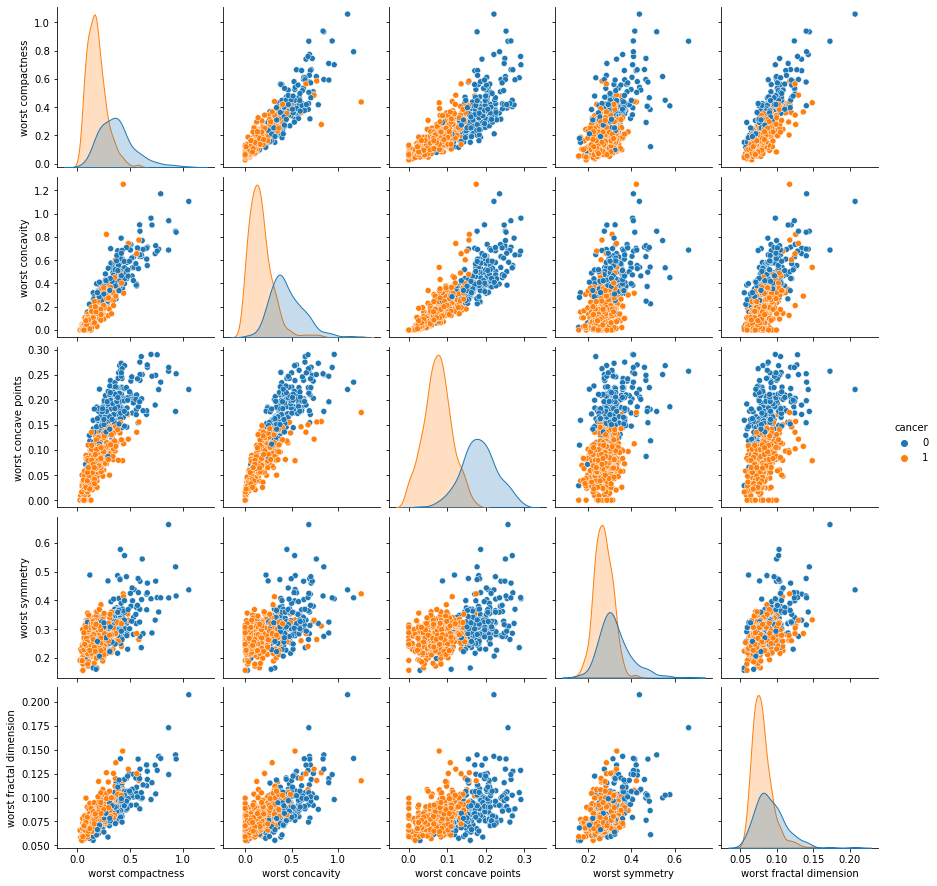

In [25]:
#查看各变量之间的关系
#pairplot主要展现的是变量两两之间的关系
sns.pairplot(df.iloc[:,25:],hue='cancer')

In [9]:
cancer=load_breast_cancer()

In [10]:
#确认数据集的数据
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
type(cancer)
#一种字典结构

sklearn.utils.Bunch

In [12]:
#确认说明变数
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
#目的变数
cancer.target[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [14]:
cancer.target_names
# 0 : malignant(悪性)
# 1 : benign(良性)

array(['malignant', 'benign'], dtype='<U9')

In [15]:
import numpy as np
malignant_count = len(np.where(cancer.target==0)[0])
benign_count = len(np.where(cancer.target==1)[0])
print('0:悪性', malignant_count)
print('1:良性', benign_count)

0:悪性 212
1:良性 357


逻辑回归

In [16]:
#分割cancer数据为训练集和测试集（20%）
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               test_size=0.2,random_state=0)

In [17]:
#分割后数据构成
print('train=',len(X_train))
print('test=',len(X_test))

train= 455
test= 114


In [21]:
#做成模型
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=3000)

In [22]:
#使用训练data学习
clf.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [63]:
clf.score(X_train,y_train)

0.9494505494505494

In [75]:
#查看各变数的系数
print(clf.coef_)

[[ 1.54055814  0.29270077  0.05502755 -0.00325904 -0.0622894  -0.29346695
  -0.39762752 -0.16510518 -0.11489352 -0.01925155  0.08381611  0.61746904
   0.4082601  -0.129621   -0.0036419  -0.06339621 -0.08639359 -0.02014551
  -0.02456042 -0.0053683   1.68529168 -0.40637529 -0.24290129 -0.02241988
  -0.10851847 -0.9430669  -1.17920208 -0.32920416 -0.31879428 -0.09568679]]


In [77]:
#オッズ比
print(np.exp(clf.coef_))

[[4.6671945  1.34004175 1.05656972 0.99674627 0.93961093 0.74567387
  0.67191226 0.84780453 0.89146106 0.98093258 1.0874289  1.85422911
  1.50419835 0.87842829 0.99636472 0.93857153 0.91723314 0.98005605
  0.97573873 0.99464608 5.39402403 0.66606016 0.78434893 0.97782958
  0.89716233 0.38943165 0.30752402 0.71949611 0.7270251  0.9087486 ]]


In [64]:
#预测
predict=clf.predict(X_test)

In [65]:
#预测精度
clf.score(X_test,y_test)

0.9473684210526315